In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='cp1252')


In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df.describe(include='object')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [8]:
df.duplicated().sum()

719

In [9]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [4]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52


### Mutual Information

In [60]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

route                    0.053394
booking_origin           0.045793
flight_duration          0.016685
wants_extra_baggage      0.009274
length_of_stay           0.009054
wants_in_flight_meals    0.006544
sales_channel            0.004190
flight_day               0.004019
num_passengers           0.002947
wants_preferred_seat     0.002706
flight_hour              0.001773
purchase_lead            0.000320
trip_type                0.000000
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

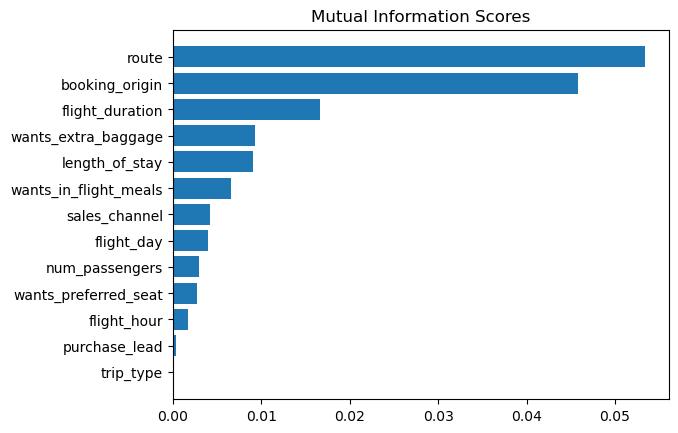

<Figure size 800x500 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt

plt.barh(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True))

plt.yticks(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True).index)

plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))

### ANOVA F-Values

In [52]:
from sklearn.feature_selection import f_classif

mi_scores = f_classif(X, y)
mi_scores = pd.Series(mi_scores[0], name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print('           F_statistic')

mi_scores

           F_statistic


booking_origin           1316.044937
flight_duration           571.050239
wants_extra_baggage       233.216332
wants_preferred_seat      125.891632
length_of_stay             90.080253
sales_channel              84.434286
trip_type                  37.057921
wants_in_flight_meals      35.164463
num_passengers             29.095371
purchase_lead              24.499494
flight_day                  5.723821
flight_hour                 2.539951
route                       2.131237
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

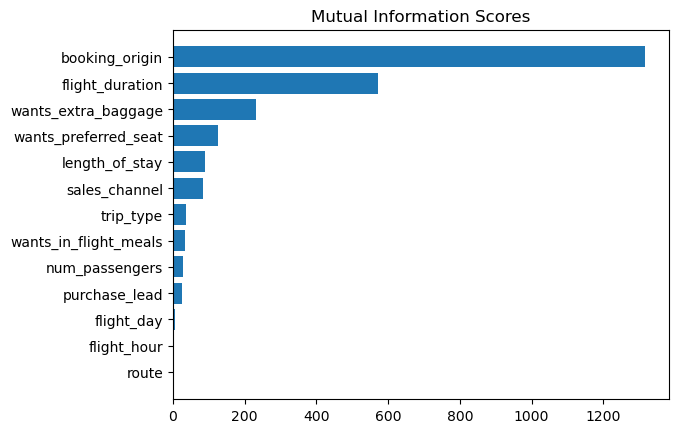

<Figure size 800x500 with 0 Axes>

In [53]:
plt.barh(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True))

plt.yticks(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True).index)

plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))

In [54]:
from sklearn.feature_selection import f_classif

mi_scores = f_classif(X, y)
mi_scores = pd.Series(mi_scores[1], name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print('           P_values')
mi_scores

           P_values


route                     1.443305e-01
flight_hour               1.110045e-01
flight_day                1.673994e-02
purchase_lead             7.457066e-07
num_passengers            6.921342e-08
wants_in_flight_meals     3.049870e-09
trip_type                 1.155038e-09
sales_channel             4.119431e-20
length_of_stay            2.383644e-21
wants_preferred_seat      3.519169e-29
wants_extra_baggage       1.558433e-52
flight_duration          1.683145e-125
booking_origin           1.855451e-284
Name: MI Scores, dtype: float64

### Chi Squared Stats

In [56]:
from sklearn.feature_selection import chi2

mi_scores = chi2(X, y)
mi_scores = pd.Series(mi_scores[0], name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print('           F_statistic')
mi_scores

           F_statistic


booking_origin           17902.548233
length_of_stay            4480.964772
purchase_lead             2358.678338
route                      250.314844
flight_duration            173.831731
wants_preferred_seat        88.288090
wants_extra_baggage         76.890347
sales_channel               74.823889
trip_type                   68.578106
wants_in_flight_meals       20.130962
num_passengers              19.018876
flight_hour                  8.207322
flight_day                   7.096858
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

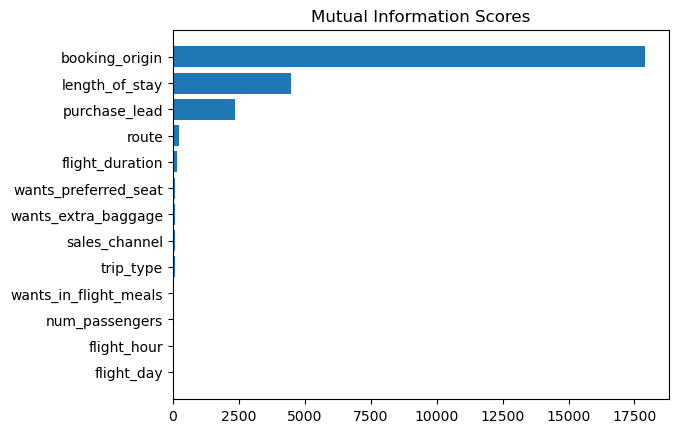

<Figure size 800x500 with 0 Axes>

In [57]:
plt.barh(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True))

plt.yticks(np.arange(len(mi_scores.sort_values(ascending=True))), mi_scores.sort_values(ascending=True).index)

plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))

In [58]:
from sklearn.feature_selection import chi2

mi_scores = chi2(X, y)
mi_scores = pd.Series(mi_scores[1], name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print('           P_values')
mi_scores

           P_values


flight_day               7.721920e-03
flight_hour              4.172169e-03
num_passengers           1.294317e-05
wants_in_flight_meals    7.231649e-06
trip_type                1.219505e-16
sales_channel            5.146322e-18
wants_extra_baggage      1.807182e-18
wants_preferred_seat     5.658313e-21
flight_duration          1.077287e-39
route                    2.217181e-56
purchase_lead            0.000000e+00
length_of_stay           0.000000e+00
booking_origin           0.000000e+00
Name: MI Scores, dtype: float64

C:\Users\Islam\anaconda3\envs\kpmg\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


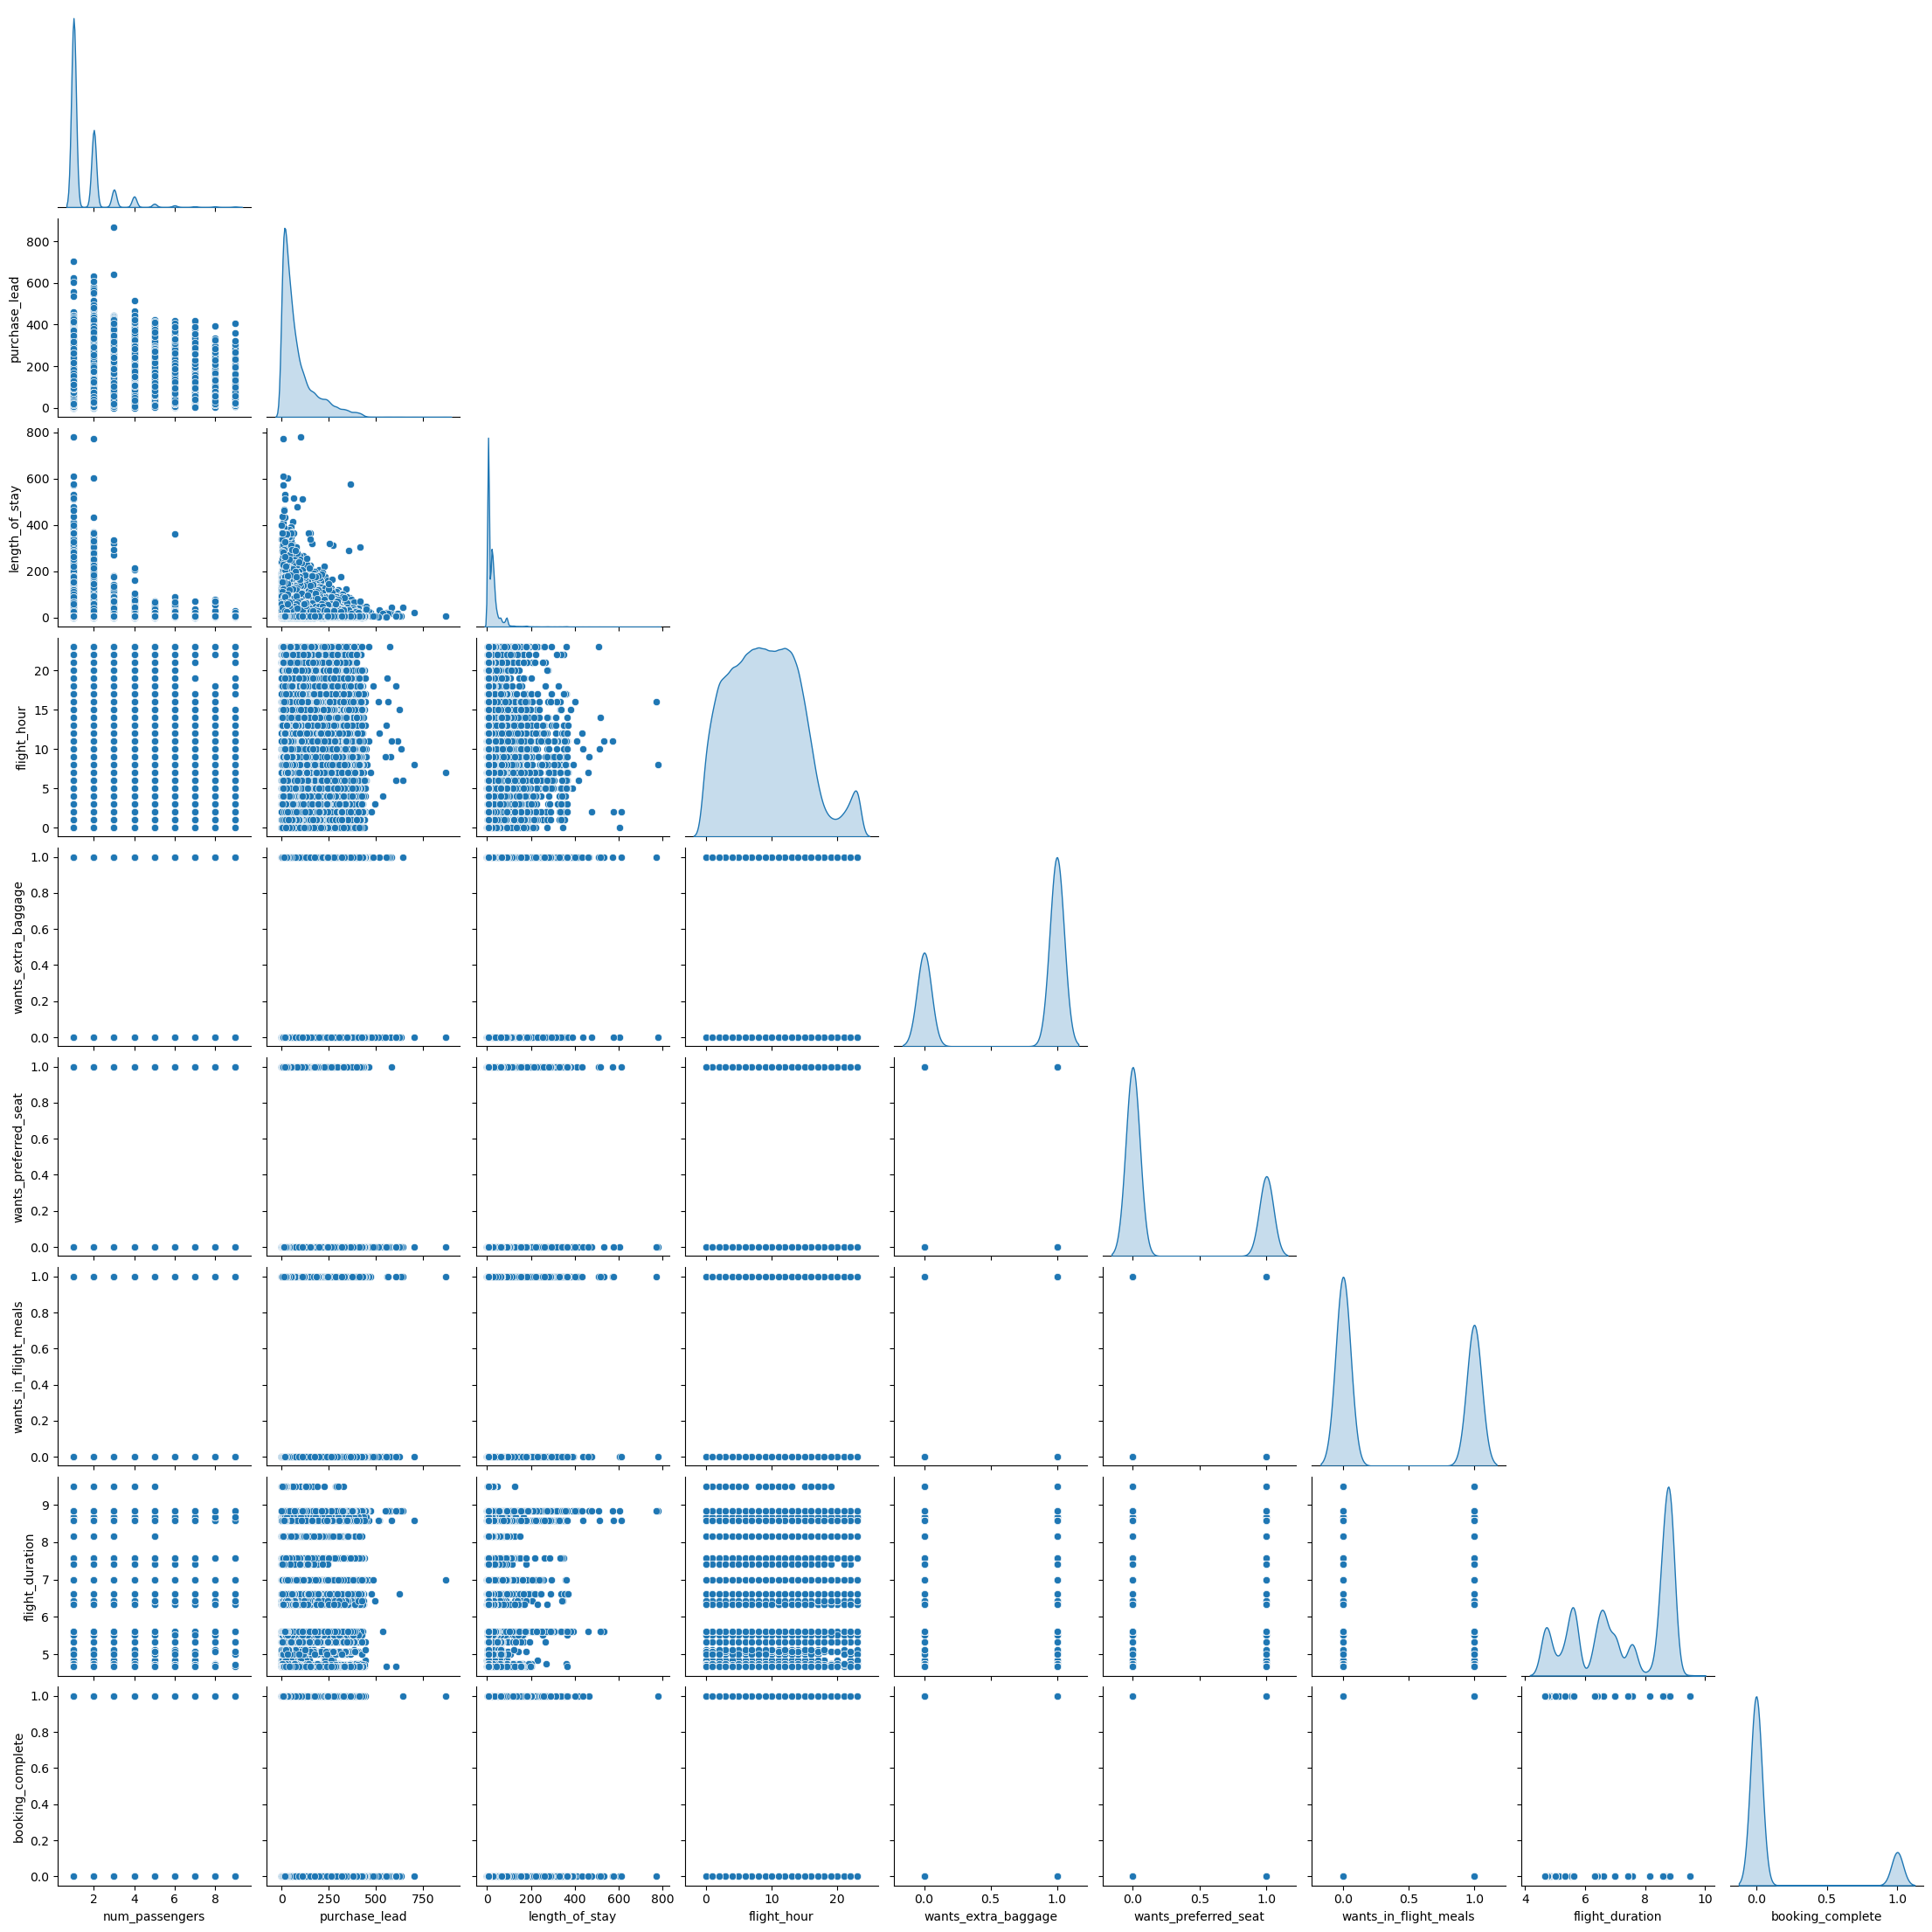

In [32]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde', corner=True)

# Model Development

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

### Spliting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Sampling

In [9]:
print(y_train.value_counts())

booking_complete
0    34002
1     5998
Name: count, dtype: int64


In [ ]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(y_train_sm.value_counts())

In [15]:
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

print(y_train_smenn.value_counts())

booking_complete
1    29120
0    20021
Name: count, dtype: int64


In [17]:
adas = ADASYN()
X_train_adas, y_train_adas = adas.fit_resample(X_train, y_train)

print(y_train_adas.value_counts())

booking_complete
0    34002
1    33942
Name: count, dtype: int64


In [18]:
smetomek = SMOTETomek()
X_train_smetomek, y_train_smetomek = smetomek.fit_resample(X_train, y_train)

print(y_train_smetomek.value_counts())

booking_complete
0    33435
1    33435
Name: count, dtype: int64


### Grid Search

In [27]:
training_data = [[X_train, y_train], [X_train_sm, y_train_sm], [X_train_smenn, y_train_smenn], [X_train_adas, y_train_adas], [X_train_smetomek, y_train_smetomek]]
data_names = ['Non-Sampled', 'SMOTE Sampling', 'SMOTEENN Sampling', 'ADASYN Sampling', 'SMOTETomek Sampling']

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

scalers = [None, minmax, standard, robust]
scalers_names = ['Non-Scaled', 'MinMax Scaler', 'Standard Scaler', 'Robust Scaler']

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, classification_report


for i, data in enumerate(training_data):
    print(data_names[i])
    for index, scaler in enumerate(scalers):
        rf_params = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}
        
        rf = RandomForestClassifier()
        grid = GridSearchCV(rf, param_grid=rf_params, scoring={'Accuracy': 'accuracy', 'ROC AUC': 'roc_auc'}, refit='Accuracy')
        
        if scaler==None and data_names[i]=='Non-Sampled':
            pass
            #print(scalers_names[index],':')
            #data_X= scaler.fit_transform(data[0])
            #grid.fit(data_X, data[1])
            #print("Best parameters: ", grid.best_params_)
            #print("Best score: ", grid.best_score_, '\n'*2)
            #grid.fit(data[0], data[1])
            #print(scalers_names[index],':')
            #print("Best parameters: ", grid.best_params_)
            #print("Best score: ", grid.best_score_, '\n'*2)

        else:
            print(scalers_names[index],':')
            data_X= scaler.fit_transform(data[0])
            grid.fit(data_X, data[1])
            print(scalers_names[index],':')
            print("Best parameters: ", grid.best_params_)
            print("Best score: ", grid.best_score_, '\n'*2)
            print("Best ROC AUC Score: ", grid_search.cv_results_['mean_test_ROC AUC'][grid_search.best_index_])

    print('-'*100)

Non-Sampled
MinMax Scaler :
MinMax Scaler :
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.85275 


Standard Scaler :


KeyboardInterrupt: 

In [25]:
    print('-'*100)

----------------------------------------------------------------------------------------------------


In [ ]:
Non-Sampled
Non-Scaled :
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.8525750000000001

In [ ]:
training_data = [[X_train, y_train], [X_train_sm, y_train_sm], [X_train_smenn, y_train_smenn], [X_train_adas, y_train_adas], [X_train_smetomek, y_train_smetomek]]


In [ ]:
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [116]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10 ,step=1)

# Fit RFE to data    
rfe.fit(X, y)  

# Get ranking and eliminate features below rank 10 cutoff  
ranks = rfe.ranking_

valuable_features = []
for i in range(len(ranks)):
    if ranks[i] < 10:
        valuable_features.append(X.columns[i])
       
    
print("Most valuable features based on RFE:")
print(valuable_features)

Most valuable features based on RFE:
['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [120]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7 ,step=1)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X, y)

# Get the selected feature indices

ranking = rfe.ranking_

print(ranking)

rfe.get_support(indices=True)

[2 6 7 1 1 1 1 1 1 5 4 3 1]


array([ 3,  4,  5,  6,  7,  8, 12], dtype=int64)

In [153]:
rf = RandomForestClassifier(n_estimators=200,
                            criterion='entropy',
                            max_depth=20,
                            max_features='sqrt',
                            min_samples_split=2,
                            min_samples_leaf=5,
                            class_weight='balanced_subsample',
                            )

rf.fit(X_train, y_train.values, )

y_pred = rf.predict(X_test)

In [121]:
rf.feature_importances_

array([0.03306005, 0.0167892 , 0.00195534, 0.14841238, 0.11729773,
       0.10427895, 0.0676981 , 0.16118015, 0.20664325, 0.01987053,
       0.01676136, 0.01913287, 0.08692009])

In [ ]:
importances_dict = dict(zip(X_train.columns, rf.feature_importances_))
importances_sorted = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))
for f, imp in importances_sorted.items():
    print(f"{f}: {imp}")

booking_origin: 0.20664325306543288
route: 0.16118014829316227
purchase_lead: 0.148412382791471
length_of_stay: 0.11729772511182031
flight_hour: 0.104278952399726
flight_duration: 0.08692009075197496
flight_day: 0.06769810246029942
num_passengers: 0.0330600497189242
wants_extra_baggage: 0.019870526300011404
wants_in_flight_meals: 0.01913286688138402
sales_channel: 0.016789204639953318
wants_preferred_seat: 0.016761358310776273
trip_type: 0.0019553392750638636


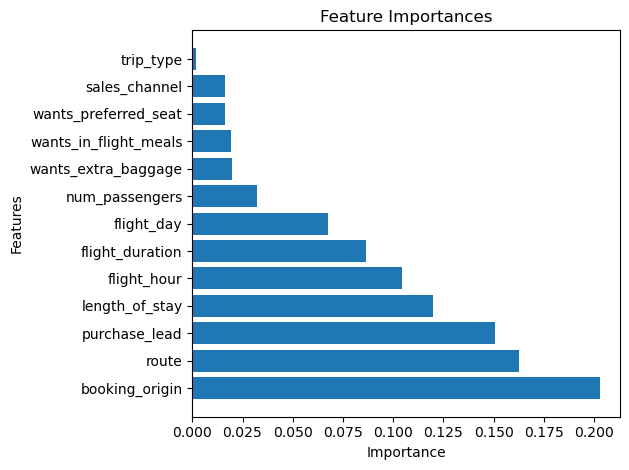

In [158]:
import matplotlib.pyplot as plt

# Calculate feature importances  
importances = rf.feature_importances_

# Sort importances in descending order
indices = np.argsort(importances)[::-1]  

features = np.array(X_train.columns)
sorted_features = features[indices]
sorted_importances = importances[indices]  

# Create plot
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), sorted_importances, align="center")

# Add labels ordered by importance  
plt.yticks(range(X_train.shape[1]), sorted_features)  

# Axis labels
plt.xlabel('Importance')
plt.ylabel('Features')

# Plot formatting
plt.tight_layout()  
plt.savefig("importances.png", dpi=300)
plt.show()

In [160]:
sorted_importances

array([0.20271049, 0.16249043, 0.15073796, 0.11959862, 0.1043011 ,
       0.08667337, 0.06738807, 0.03241337, 0.0199368 , 0.0192768 ,
       0.01638892, 0.01612837, 0.0019557 ])

In [161]:
indices

array([ 8,  7,  3,  4,  5, 12,  6,  0,  9, 11, 10,  1,  2], dtype=int64)

In [166]:
np.argsort(importances)[::-1]

array([ 8,  7,  3,  4,  5, 12,  6,  0,  9, 11, 10,  1,  2], dtype=int64)

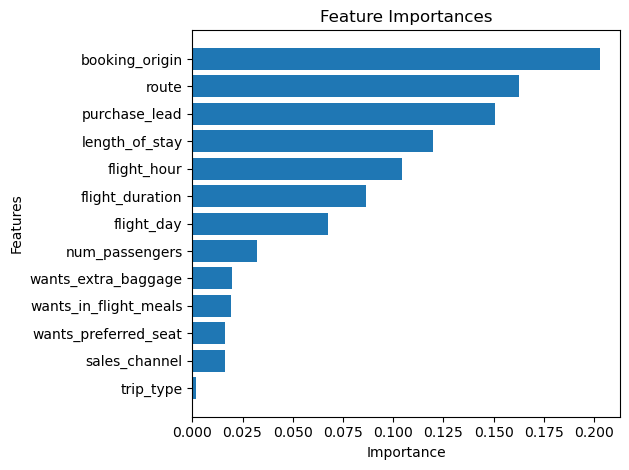

In [167]:
import matplotlib.pyplot as plt

# Calculate feature importances
importances = rf.feature_importances_ 

# Sort importances  
indices = np.argsort(importances)[::1]
features = np.array(X_train.columns)
sorted_features = features[indices]
sorted_importances = importances[indices]

# Create plot
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), sorted_importances, align="center")

# Add labels
plt.yticks(range(X_train.shape[1]), sorted_features) 

# Axis labels
plt.xlabel('Importance')
plt.ylabel('Features')   

# Plot formatting
plt.tight_layout()
plt.savefig("importances.png", dpi=300)
plt.show()

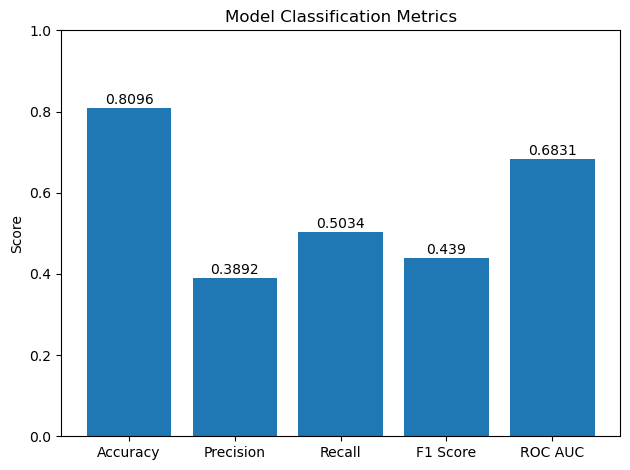

In [155]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [0.8096, 0.3892, 0.5034, 0.4390, 0.6831]

fig, ax = plt.subplots()
ax.bar(metrics, values)
ax.set_ylabel('Score')
ax.set_ylim([0,1])

for i, v in enumerate(values): 
    ax.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.title("Model Classification Metrics")
plt.tight_layout()
plt.show()

In [154]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))  
print("ROC AUC:", roc_auc_score(y_test, y_pred, multi_class='ovo'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8096
Precision: 0.3892371995820272
Recall: 0.5033783783783784
F1 Score: 0.43901001767825576
ROC AUC: 0.6830859028042128
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      8520
           1       0.39      0.50      0.44      1480

    accuracy                           0.81     10000
   macro avg       0.65      0.68      0.66     10000
weighted avg       0.83      0.81      0.82     10000



In [ ]:
n_estimators=200,
                            criterion='entropy',
                            max_depth=20,
                            max_features='sqrt',
                            min_samples_split=2,
                            min_samples_leaf=5,
                            class_weight='balanced_subsample',
Accuracy: 0.8092
Precision: 0.3885416666666667
Recall: 0.504054054054054
F1 Score: 0.43882352941176467
ROC AUC: 0.6831303134120036
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      8520
           1       0.39      0.50      0.44      1480

    accuracy                           0.81     10000
   macro avg       0.65      0.68      0.66     10000
weighted avg       0.83      0.81      0.82     10000

In [ ]:
Accuracy: 0.8087
Precision: 0.3855103120042306
Recall: 0.4925675675675676
F1 Score: 0.43251260753485615
ROC AUC: 0.678091295520873
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      8520
           1       0.39      0.49      0.43      1480

    accuracy                           0.81     10000
   macro avg       0.65      0.68      0.66     10000
weighted avg       0.83      0.81      0.82     10000

In [ ]:

Accuracy: 0.7777
Precision: 0.3291954022988506
Recall: 0.4837837837837838
F1 Score: 0.39179206566347474
ROC AUC: 0.6562698261641923
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      8520
           1       0.33      0.48      0.39      1480

    accuracy                           0.78     10000
   macro avg       0.62      0.66      0.63     10000
weighted avg       0.82      0.78      0.79     10000

In [ ]:
Accuracy: 0.8564
Precision: 0.6309523809523809
Recall: 0.07162162162162163
F1 Score: 0.12864077669902912
ROC AUC: 0.5321723131582287
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.63      0.07      0.13      1480

    accuracy                           0.86     10000
   macro avg       0.75      0.53      0.53     10000
weighted avg       0.83      0.86      0.80     10000